## 0. 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

DATA_PATH = './data/[Dataset]BigData_Type02/'
X_TRAIN_DATA_NAME = 'X_train.csv'
X_TEST_DATA_NAME = 'X_test.csv'
Y_TRAIN_DATA_NAME = 'y_train.csv'

## 1. Data Load

In [2]:
# load datasets 
X_train = pd.read_csv(DATA_PATH + X_TRAIN_DATA_NAME, index_col=0, encoding='cp949')
X_test = pd.read_csv(DATA_PATH + X_TEST_DATA_NAME, index_col=0, encoding='cp949')
y_train = pd.read_csv(DATA_PATH + Y_TRAIN_DATA_NAME, index_col=0, encoding='cp949')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총구매액     3500 non-null   int64  
 1   최대구매액    3500 non-null   int64  
 2   환불금액     1205 non-null   float64
 3   주구매상품    3500 non-null   object 
 4   주구매지점    3500 non-null   object 
 5   내점일수     3500 non-null   int64  
 6   내점당구매건수  3500 non-null   float64
 7   주말방문비율   3500 non-null   float64
 8   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 273.4+ KB


In [3]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 3500 to 5981
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총구매액     2482 non-null   int64  
 1   최대구매액    2482 non-null   int64  
 2   환불금액     871 non-null    float64
 3   주구매상품    2482 non-null   object 
 4   주구매지점    2482 non-null   object 
 5   내점일수     2482 non-null   int64  
 6   내점당구매건수  2482 non-null   float64
 7   주말방문비율   2482 non-null   float64
 8   구매주기     2482 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 193.9+ KB


In [4]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  3500 non-null   int64
dtypes: int64(1)
memory usage: 54.7 KB


## 2. 데이터 탐색

In [5]:
# data head 확인
X_train.head(3)

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1


In [6]:
X_test.head(3)

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3


In [7]:
y_train.head(3)

,gender
cust_id,
0,0
1,0
2,1


In [8]:
# 통계치 확인
pd.options.display.float_format = "{:.3f}".format
X_train.describe()

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3500.000,3500.000,1205.000,3500.000,3500.000,3500.000,3500.000
mean,91919251.797,19664241.780,24078215.992,19.254,2.835,0.307,20.958
std,163506530.314,31992347.943,47464527.823,27.175,1.912,0.290,24.749
min,-52421520.000,-2992000.000,5600.000,1.000,1.000,0.000,0.000
25%,4747050.000,2875000.000,2259000.000,2.000,1.667,0.027,4.000
50%,28222700.000,9837000.000,7392000.000,8.000,2.333,0.256,13.000
75%,106507930.000,22962500.000,24120000.000,25.000,3.375,0.449,28.000
max,2323180070.000,706629000.000,563753000.000,285.000,22.083,1.000,166.000


['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']


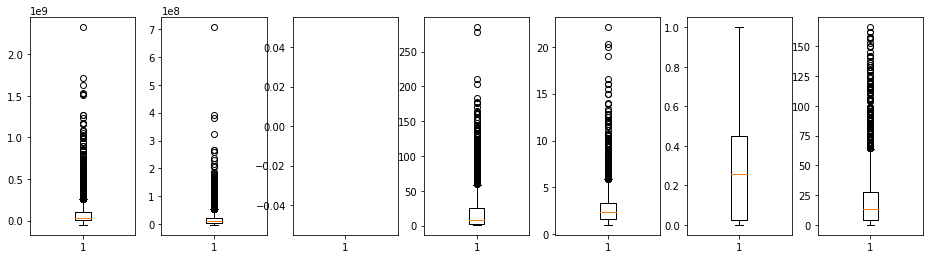

In [9]:
# 연속형 변수 컬럼
qlt_cols = ['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']

# 연속형 변수 박스플롯 그리기
fig, axs = plt.subplots(1, len(qlt_cols), figsize=[16, 4])
fig.subplots_adjust(wspace=0.25)
for i, col in enumerate(qlt_cols):
    axs[i].boxplot(X_train.loc[:, col])
    # axs[i].set_title(col)
    
print(qlt_cols)
plt.show()

주구매상품
기타      595
가공식품    546
농산물     339
화장품     264
시티웨어    213
dtype: int64
unique val count:  42

주구매지점
본  점    1077
잠실점      474
분당점      436
부산본점     245
영등포점     241
dtype: int64
unique val count:  24

['주구매상품', '주구매지점']


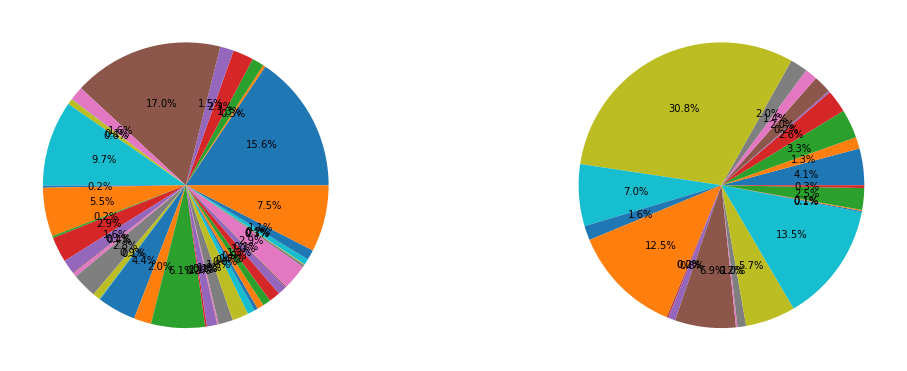

In [10]:
# 범주형 변수 칼럼
qtt_cols = ['주구매상품', '주구매지점']

# 범주형 변수 파이차트 그리기
fig, axs = plt.subplots(1, len(qtt_cols), figsize=[16, 16])
fig.subplots_adjust(wspace=0.5, hspace=0.2)
for i, col in enumerate(qtt_cols):
    grp_df = X_train.groupby(by=col).size()
    print(grp_df.sort_values(ascending=False)[:5])
    print('unique val count: ', len(grp_df))
    print()
    axs[i].pie(grp_df, autopct ='%.1f%%')
    # axs[i].set_title(col, color='w')
    # axs[i].legend(loc='center right', bbox_to_anchor=(1.3, 0.5))

print(qtt_cols)
plt.show()

## 3. 데이터 정제

In [21]:
# 학습 데이터 X, y값 하나의 DataFrame으로 결합
# 따로 있으면 정제 할때 귀찮음
sales_data = X_train.join(y_train, how='left')
sales_data

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
cust_id,,,,,,,,,,
0,68282840,11264000,6860000.000,기타,강남점,19,3.895,0.527,17,0
1,2136000,2136000,300000.000,스포츠,잠실점,2,1.500,0.000,1,0
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000,0.000,1,1
3,16077620,4935000,NaN,기타,광주점,18,2.444,0.318,16,1
4,29050000,24000000,NaN,보석,본 점,2,1.500,0.000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,골프,본 점,1,2.000,1.000,0,1
3496,29628600,7200000,6049600.000,시티웨어,부산본점,8,1.625,0.462,40,1
3497,75000,75000,NaN,주방용품,창원점,1,1.000,0.000,0,0


### 3-1. 데이터 필터링

In [22]:
# 총구매액 < 0 데이터 제거
rm_idx = sales_data[sales_data['총구매액'] < 0].index
sales_data.drop(index=rm_idx, inplace=True)
print(sales_data.shape)

(3497, 10)


In [23]:
# 최대구매액 < 0 데이터 제거
rm_idx = sales_data[sales_data['최대구매액'] < 0].index
sales_data.drop(index=rm_idx, inplace=True)
print(sales_data.shape)

(3497, 10)


### 3-2. 결측치 처리

In [24]:
# 환불금액 칼럼 결측치 처리
sales_data['환불금액'] = sales_data['환불금액'].fillna(0)
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총구매액     3497 non-null   int64  
 1   최대구매액    3497 non-null   int64  
 2   환불금액     3497 non-null   float64
 3   주구매상품    3497 non-null   object 
 4   주구매지점    3497 non-null   object 
 5   내점일수     3497 non-null   int64  
 6   내점당구매건수  3497 non-null   float64
 7   주말방문비율   3497 non-null   float64
 8   구매주기     3497 non-null   int64  
 9   gender   3497 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 429.6+ KB


### 3-3. 이상치 처리

In [25]:
# IQR 방식의 이상치 인덱스 반환 함수
def _outlier_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return data[(data > upper_bound) | (data < lower_bound)].index, (lower_bound, upper_bound)

# 연속형 변수 이상치 제거 함수
def remove_outlier(df):
    global qlt_cols
    for col in qlt_cols:
        rm_idx, _ = _outlier_iqr(df[col])
        df.drop(index=rm_idx, inplace=True)
    return df

# 이상치 Min, Max 대치 함수
def convert_mm_outlier(df):
    global qlt_cols
    for col in qlt_cols:
        cv_idx, v = _outlier_iqr(df[col])
        df[col] = df[col].apply(lambda x: v[0] if x<v[0] else v[1] if x>v[1] else x)
    return df

In [26]:
# 이상치를 제거한 데이터셋
sales_data_r = remove_outlier(sales_data.copy())
sales_data_r

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
cust_id,,,,,,,,,,
1,2136000,2136000,300000.000,스포츠,잠실점,2,1.500,0.000,1,0
2,3197000,1639000,0.000,남성 캐주얼,관악점,2,2.000,0.000,1,1
3,16077620,4935000,0.000,기타,광주점,18,2.444,0.318,16,1
4,29050000,24000000,0.000,보석,본 점,2,1.500,0.000,85,0
5,11379000,9552000,462000.000,디자이너,일산점,3,1.667,0.200,42,0
...,...,...,...,...,...,...,...,...,...,...
3491,20865800,8610000,0.000,일용잡화,분당점,5,1.800,0.222,32,1
3492,10741000,9154000,0.000,시티웨어,영등포점,2,1.000,0.500,86,0
3495,3175200,3042900,0.000,골프,본 점,1,2.000,1.000,0,1


In [27]:
# 이상치를 Min, Max 값으로 대체한 데이터셋
sales_data_c = convert_mm_outlier(sales_data.copy())
sales_data_c

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
cust_id,,,,,,,,,,
0,68282840.000,11264000.000,6440000.000,기타,강남점,19.000,3.895,0.527,17.000,0
1,2136000.000,2136000.000,300000.000,스포츠,잠실점,2.000,1.500,0.000,1.000,0
2,3197000.000,1639000.000,0.000,남성 캐주얼,관악점,2.000,2.000,0.000,1.000,1
3,16077620.000,4935000.000,0.000,기타,광주점,18.000,2.444,0.318,16.000,1
4,29050000.000,24000000.000,0.000,보석,본 점,2.000,1.500,0.000,64.000,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200.000,3042900.000,0.000,골프,본 점,1.000,2.000,1.000,0.000,1
3496,29628600.000,7200000.000,6049600.000,시티웨어,부산본점,8.000,1.625,0.462,40.000,1
3497,75000.000,75000.000,0.000,주방용품,창원점,1.000,1.000,0.000,0.000,0


## 4. Feature Engineering

In [39]:
# 독랍변수, 종속변수 칼럼 지정
X_val = ['총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']
y_val = ['gender']

In [34]:
# 학습에 쓰일 데이터
X_data = sales_data_r[X_val]
y_data = sales_data_r[y_val]
X_data.head(3)

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
1,2136000,2136000,300000.000,스포츠,잠실점,2,1.500,0.000,1
2,3197000,1639000,0.000,남성 캐주얼,관악점,2,2.000,0.000,1
3,16077620,4935000,0.000,기타,광주점,18,2.444,0.318,16


### 4-1. 더미 데이터화

In [35]:
X_data = pd.get_dummies(X_data)
X_data.head(3)

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
cust_id,,,,,,,,,,,,,,,,,,,,,
1,2136000,2136000,300000.000,2,1.500,0.000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3197000,1639000,0.000,2,2.000,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16077620,4935000,0.000,18,2.444,0.318,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. 모델 학습

In [36]:
print(X_data.shape, y_data.shape)

(1882, 72) (1882, 1)


### 5-1. Linear Regression

In [37]:
import sklearn.linear_model as sk_lm

# linear regression 객체화
regr = sk_lm.LinearRegression()

# 필요한 변수만 선택
select_val = ['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']
X = X_data[select_val]
y = y_data.copy()

# 모델 학습
regr.fit(X, y)

print(regr.coef_)
print(regr.intercept_)

[[-7.44884869e-10 -2.82003126e-09 -1.02061697e-07 -4.63914759e-03
   6.60795712e-03  7.17223807e-02 -7.12395296e-04]]
[0.50677407]


### 5-2. Logistic Regression

In [38]:
import sklearn.linear_model as sk_lm

# logistic regression 객체화
lregr = sk_lm.LogisticRegression()

# 필요한 변수만 선택
select_val = ['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']
X = X_data[select_val]
y = y_data.copy()

# 모델 학습
lregr.fit(X, y)

print(lregr.coef_)
print(lregr.intercept_)

[[-6.01036762e-09 -6.91900880e-09 -5.06379171e-07 -1.44262144e-11
   2.80698641e-12  1.96405673e-12 -5.16728672e-11]]
[1.1417189e-12]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### 5-3. Decision Tree 

In [40]:
import sklearn.tree as tree

dtree = tree.DecisionTreeClassifier()
X = X_data.copy()
y = y_data.copy()
dtree.fit(X, y)
tree.plot_tree

<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)>

### 5-4. Random Forest

### 5-5. Support Vector Machine

### 5-6. XGBoost